In [2]:
# !unzip '/content/Insurance Premium Prediction.zip'

Archive:  /content/Insurance Premium Prediction.zip
  inflating: Insurance Premium Prediction.csv  


In [1]:
!pip install optuna

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.1 MB 409.0 kB/s eta 0:00:04
   --------- ------------------------------ 0.5/2.1 MB 409.0 kB/s eta 0:00:04
   --------- ------------------------------ 0.5/2.1 MB 409.0 kB/s eta 0:00:04
   --------- ------------------------------ 0.5/2.1 MB 409.0 kB/s eta 0:00:04
   --------- ------------------------------ 0.5/2.1 MB 409.0 kB/s eta 0:00:04
   -------------- ------------------------- 0.8/2.1 MB 305.0 kB/s eta 0:00:05
   -------------- ------------------------- 0.8/2.1 MB 305.0 kB/s eta 0:00:05
   -------------- ----------------------

In [2]:
!pip install lightgbm

In [3]:
!pip install pyspark

     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.3/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.3/317.3 MB ? eta -:--:--
     -------------------------------------- 0.5/317.3 MB 524.3 kB/s eta 0:10:05
     -------------------------------------- 0.5/317.3 MB 524.3 kB/s eta 0:10:05
     -------------------------------------- 0.5/317.3 MB 524.3 kB/s eta 0:10:05
     -------------------------------------- 0.8/317.3 MB 441.3 kB/s eta 0:11:58
     ------------------

In [4]:
from pyspark.mllib.stat import KernelDensity
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyspark.sql.functions import to_date,col, year, month, dayofmonth, dayofweek, date_format,when,monotonically_increasing_id,sin, cos, lit, floor
from math import pi
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.feature import Imputer
from pyspark.sql.types import DoubleType, IntegerType
import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_log_error,mean_squared_error, mean_absolute_error, r2_score

import optuna
import lightgbm as lgb

import torch
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

c:\Users\Devesh Gautam\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Devesh Gautam\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [51]:
df=pd.read_csv("/content/Insurance Premium Prediction.csv")

In [52]:
df.shape

(1200000, 21)

In [53]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [55]:
0.05*len(df)

60000.0

In [56]:
df.describe().round(2)

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1200000.00,1181295.00,1155051.00,1090328.00,1125924.00,835971.00,1199994.00,1062118.00,1199999.00,1200000.00
mean,599999.50,41.15,32745.22,2.01,25.61,1.00,9.57,592.92,5.02,1102.54
std,346410.31,13.54,32179.51,1.42,12.20,0.98,5.78,149.98,2.59,865.00
min,0.00,18.00,1.00,0.00,2.01,0.00,0.00,300.00,1.00,20.00
25%,299999.75,30.00,8001.00,1.00,15.92,0.00,5.00,468.00,3.00,514.00
50%,599999.50,41.00,23911.00,2.00,24.58,1.00,10.00,595.00,5.00,872.00
75%,899999.25,53.00,44634.00,3.00,34.53,2.00,15.00,721.00,7.00,1509.00
max,1199999.00,64.00,149997.00,4.00,58.98,9.00,19.00,849.00,9.00,4999.00


In [57]:
df.isna().sum()

,0
id,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0


In [58]:
df_new=df.copy()
df_new=df_new.dropna(subset=['id','Age','Marital Status','Annual Income'])
df_new.isna().sum()

,0
id,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,102264
Education Level,0
Occupation,334217
Health Score,69783
Location,0


In [59]:
df_new.drop(['id'],axis=1,inplace=True)

In [60]:
# Define the target column
target_column = 'Premium Amount'

# Select categorical and numerical columns (initial)
categorical_columns = df_new.select_dtypes(include=['object']).columns
numerical_columns = df_new.select_dtypes(exclude=['object']).columns

# Print out column information
print("Target Column:", target_column)
print("\nCategorical Columns:", categorical_columns.tolist())
print("\nNumerical Columns:", numerical_columns.tolist())

Target Column: Premium Amount

Categorical Columns: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

Numerical Columns: ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']


In [61]:
for column in categorical_columns:
    num_unique = df_new[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

'Gender' has 2 unique categories.
'Marital Status' has 3 unique categories.
'Education Level' has 4 unique categories.
'Occupation' has 3 unique categories.
'Location' has 3 unique categories.
'Policy Type' has 3 unique categories.
'Policy Start Date' has 166134 unique categories.
'Customer Feedback' has 3 unique categories.
'Smoking Status' has 2 unique categories.
'Exercise Frequency' has 4 unique categories.
'Property Type' has 3 unique categories.


In [62]:
# Print top 10 unique value counts for each categorical column
for column in categorical_columns:
    print(f"\nTop value counts in '{column}':\n{df_new[column].value_counts().head(10)}")


Top value counts in 'Gender':
Gender
Male      562294
Female    557502
Name: count, dtype: int64

Top value counts in 'Marital Status':
Marital Status
Single      374685
Married     373719
Divorced    371392
Name: count, dtype: int64

Top value counts in 'Education Level':
Education Level
PhD            283287
Master's       283260
Bachelor's     282957
High School    270292
Name: count, dtype: int64

Top value counts in 'Occupation':
Occupation
Employed         264118
Self-Employed    263584
Unemployed       257877
Name: count, dtype: int64

Top value counts in 'Location':
Location
Suburban    374505
Rural       374426
Urban       370865
Name: count, dtype: int64

Top value counts in 'Policy Type':
Policy Type
Premium          374694
Comprehensive    372979
Basic            372123
Name: count, dtype: int64

Top value counts in 'Policy Start Date':
Policy Start Date
2020-02-08 15:21:39.134960    133
2022-02-02 15:21:39.134960    130
2023-08-13 15:21:39.155231    129
2022-08-30 15:21:3

In [63]:
print("The mean of columns:")
print(df[numerical_columns].mean())
print("\nThe skewness of columns:")
print(df_new[numerical_columns].skew(axis=1,skipna=True))

The mean of columns:
Age                        41.145563
Annual Income           32745.217777
Number of Dependents        2.009934
Health Score               25.613908
Previous Claims             1.002689
Vehicle Age                 9.569889
Credit Score              592.924350
Insurance Duration          5.018219
Premium Amount           1102.544822
dtype: float64

The skewness of columns:
0          2.620303
1          2.986739
2          2.825846
3          2.999822
4          2.985418
             ...   
1199993    1.638476
1199994    2.803696
1199995    2.816273
1199996    2.642384
1199997    2.828158
Length: 1119796, dtype: float64


In [64]:
def date(df_new):

    df_new['Policy Start Date'] = pd.to_datetime(df_new['Policy Start Date'])
    df_new['Day'] = df_new['Policy Start Date'].dt.day
    df_new['Month'] = df_new['Policy Start Date'].dt.month
    df_new['Month_sin'] = np.sin(2 * np.pi * df_new['Month'] / 12)
    df_new['Day_sin'] = np.sin(2 * np.pi * df_new['Day'] / 31)

    df_new.drop(['Policy Start Date',
                 'Day','Month'], axis=1, inplace=True)

    return df_new

# Apply the date function to both datasets
df_new = date(df_new)

In [67]:
target_column = 'Premium Amount'

# Select categorical and numerical columns (initial)
categorical_columns = df_new.select_dtypes(include=['object']).columns
numerical_columns = df_new.select_dtypes(exclude=['object']).columns

In [73]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
df_new_cat=MultiColumnLabelEncoder(columns =categorical_columns).fit_transform(df_new)

In [75]:
df_new_cat.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Month_sin,Day_sin
0,19.0,0,10049.0,1,1.0,0,1,22.598761,2,2,...,17.0,372.0,5.0,2,0,3,2,2869.0,-2.449294e-16,-0.998717
1,39.0,0,31678.0,0,3.0,2,3,15.569731,0,1,...,12.0,694.0,2.0,0,1,1,2,1483.0,1.224647e-16,0.651372
2,23.0,1,25602.0,0,3.0,1,1,47.177549,1,2,...,14.0,NaN,3.0,1,1,3,2,567.0,-1.000000e+00,-0.201299
3,21.0,1,141855.0,1,2.0,0,3,10.938144,0,0,...,0.0,367.0,1.0,2,1,0,0,765.0,1.224647e-16,0.651372
4,21.0,1,39651.0,2,1.0,0,1,20.376094,0,2,...,8.0,598.0,4.0,2,1,3,2,2022.0,-2.449294e-16,0.201299


In [78]:
categorical_columns = df_new_cat.select_dtypes(include=['object']).columns
numerical_columns = df_new_cat.select_dtypes(exclude=['object']).columns
print(categorical_columns)
print(numerical_columns)

Index([], dtype='object')
Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type',
       'Premium Amount', 'Month_sin', 'Day_sin'],
      dtype='object')


In [93]:
for col in numerical_columns:
  col_mode=df_new_cat[col].mode()[0]
  df_new_cat[col]=df_new_cat[col].fillna(col_mode)
df_new_cat.isna().sum()

,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0
Policy Type,0


In [96]:
scaler = RobustScaler()
df_new_cat = scaler.fit_transform(df_new_cat)

In [101]:
df_new_cat=pd.DataFrame(df_new_cat,columns=numerical_columns)
df_new_cat.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Month_sin,Day_sin
0,-0.956522,-1.0,-0.380819,0.0,-0.5,-0.666667,-0.5,-0.037482,0.5,0.5,...,0.7,-0.981343,0.00,0.5,-1.0,0.5,0.5,2.012146,-3.673940e-16,-0.688967
1,-0.086957,-1.0,0.214235,-0.5,0.5,0.000000,0.5,-0.446877,-0.5,0.0,...,0.2,0.220149,-0.75,-0.5,0.0,-0.5,0.5,0.609312,0.000000e+00,0.449351
2,-0.782609,0.0,0.047073,-0.5,0.5,-0.333333,-0.5,1.394073,0.0,0.5,...,0.4,0.455224,-0.50,0.0,0.0,0.5,0.5,-0.317814,-1.000000e+00,-0.138866
3,-0.869565,0.0,3.245406,0.0,0.0,-0.666667,0.5,-0.716636,-0.5,-0.5,...,-1.0,-1.000000,-1.00,0.5,0.0,-1.0,-0.5,-0.117409,0.000000e+00,0.449351
4,-0.869565,0.0,0.433586,0.5,-0.5,-0.666667,-0.5,-0.166937,-0.5,0.5,...,-0.2,-0.138060,-0.25,0.5,0.0,0.5,0.5,1.154858,-3.673940e-16,0.138866


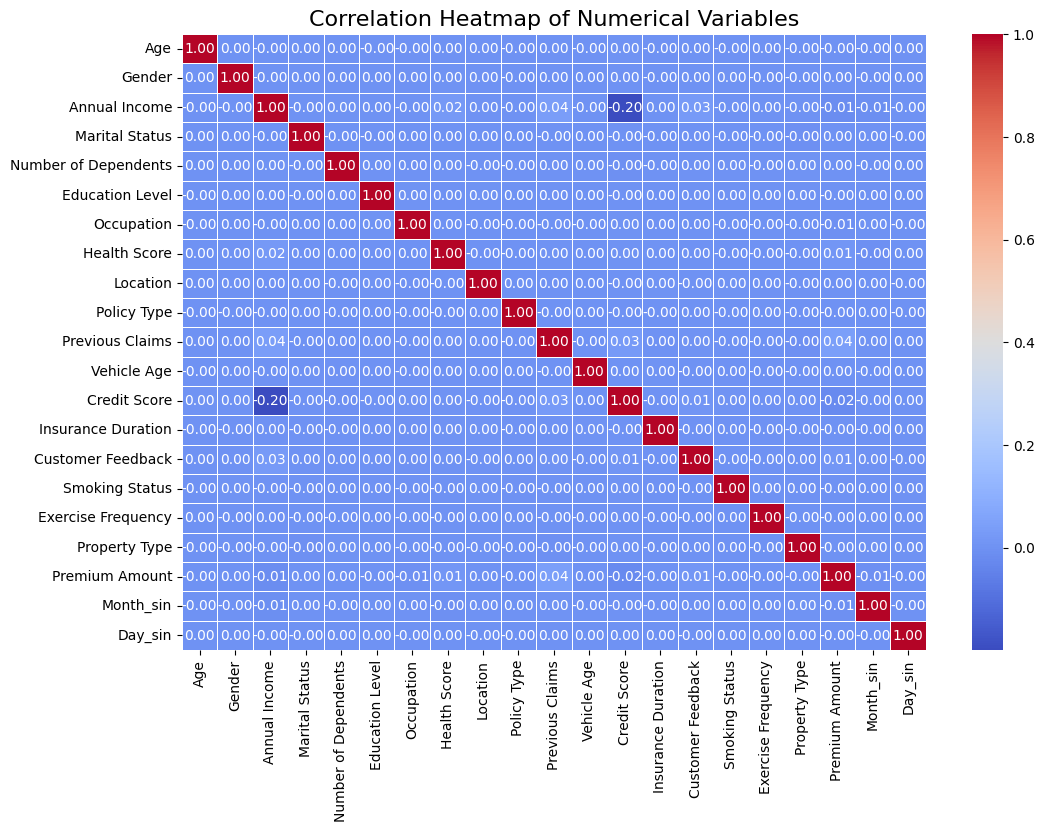

In [102]:
# Calculate the correlation matrix
correlation_matrix = df_new_cat.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

In [103]:
# Split train data into features and target
# Define the target column
target_column = 'Premium Amount'
X = df_new_cat[['Annual Income','Occupation','Previous Claims','Credit Score','Customer Feedback','Month_sin']]
y = df_new_cat[target_column]

In [104]:
# Select categorical and numerical columns (initial)
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

In [105]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Define Optuna optimization function
def objective(trial):
    # Define parameter search space
    param = {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart"]),
        "num_leaves": trial.suggest_int("num_leaves", 200, 512),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.6, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.6, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 5, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_depth": trial.suggest_int("max_depth", -1, 16),  # -1 means no limit
        "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-4, 10.0),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-4, 10.0),
        "seed" : 42

    }

    # Create a LightGBM dataset
    dtrain = lgb.Dataset(X_train, label=y_train)
    dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)

    # Train LightGBM model
    model = lgb.train(
        param,
        dtrain,
        valid_sets=[dval],
    )

    # Predict on validation set
    y_val_pred = model.predict(X_val)

    # Compute RMSLE using sklearn's root_mean_squared_log_error
    rmsle = root_mean_squared_log_error(y_val, np.maximum(y_val_pred, 0))
    return rmsle

# Run Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=1)

[I 2025-02-05 06:54:38,263] A new study created in memory with name: no-name-69136949-9c31-44a1-92fa-e4c15c20b564
<ipython-input-106-59944fd96c73>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-106-59944fd96c73>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.6, 1.0),
<ipython-input-106-59944fd96c73>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction": trial.suggest_uniform("bag

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 533
[LightGBM] [Info] Number of data points in the train set: 895836, number of used features: 6
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.229161


[I 2025-02-05 06:55:24,760] Trial 0 finished with value: 0.8420167670785468 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 378, 'learning_rate': 0.00463342373100953, 'feature_fraction': 0.795425642327683, 'bagging_fraction': 0.8287678663654957, 'bagging_freq': 5, 'min_data_in_leaf': 37, 'max_depth': 0, 'lambda_l1': 0.5292622845567669, 'lambda_l2': 0.6762329935193044}. Best is trial 0 with value: 0.8420167670785468.


In [107]:
# Initialize or update the best_params dictionary
best_params ={'boosting_type': 'gbdt', 'num_leaves': 378, 'learning_rate': 0.00463342373100953, 'feature_fraction': 0.795425642327683, 'bagging_fraction': 0.8287678663654957, 'bagging_freq': 5, 'min_data_in_leaf': 37, 'max_depth': 0, 'lambda_l1': 0.5292622845567669, 'lambda_l2': 0.6762329935193044 ,
'seed':42}

In [108]:
final_model = lgb.train(
    best_params,
    lgb.Dataset(X, label=y),
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 533
[LightGBM] [Info] Number of data points in the train set: 1119796, number of used features: 6
[LightGBM] [Info] Start training from score 0.229462



Performance Metrics:
------------------------------
RMSLE: 0.8417
RMSE: 0.8631
MAE: 0.6661
R²: 0.0164
MAPE: inf%


<ipython-input-109-ee89cbf5a356>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette="coolwarm")


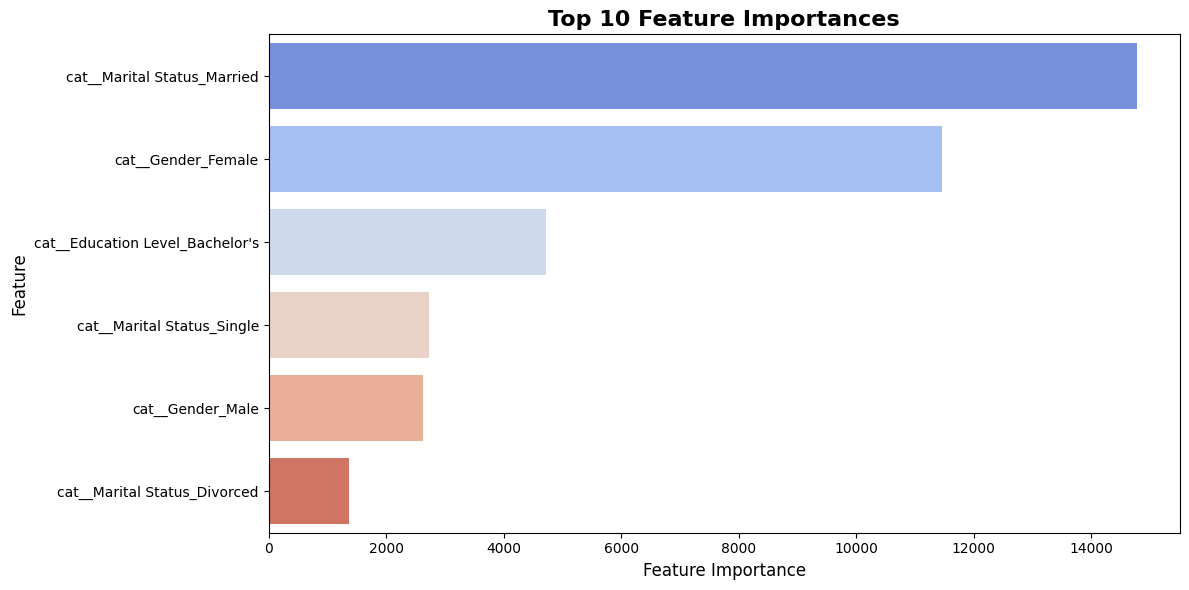

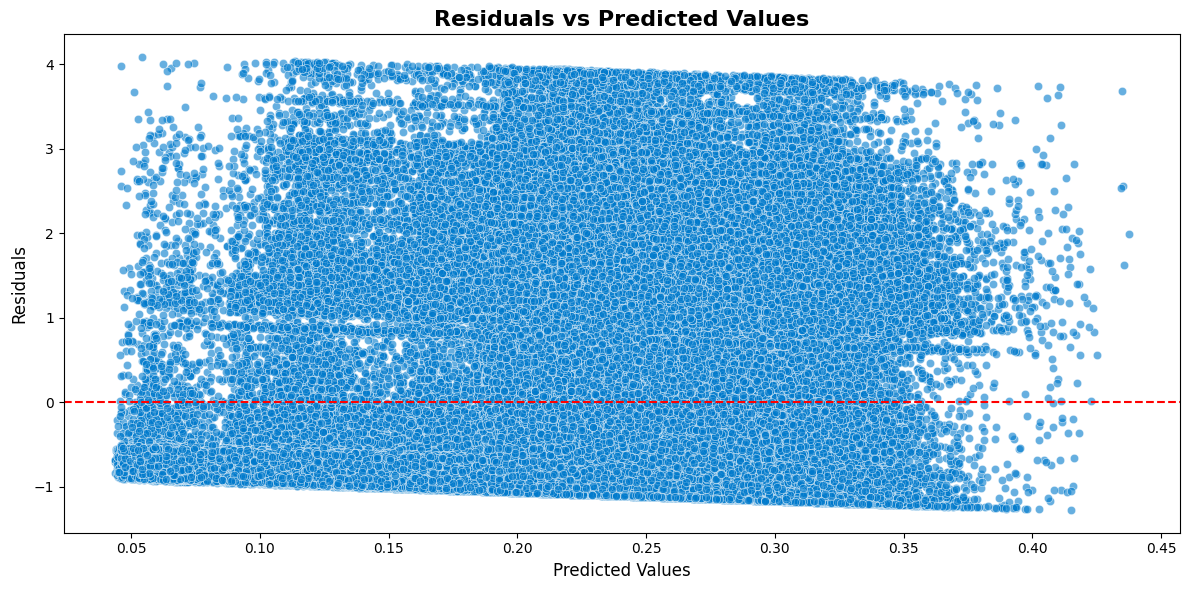

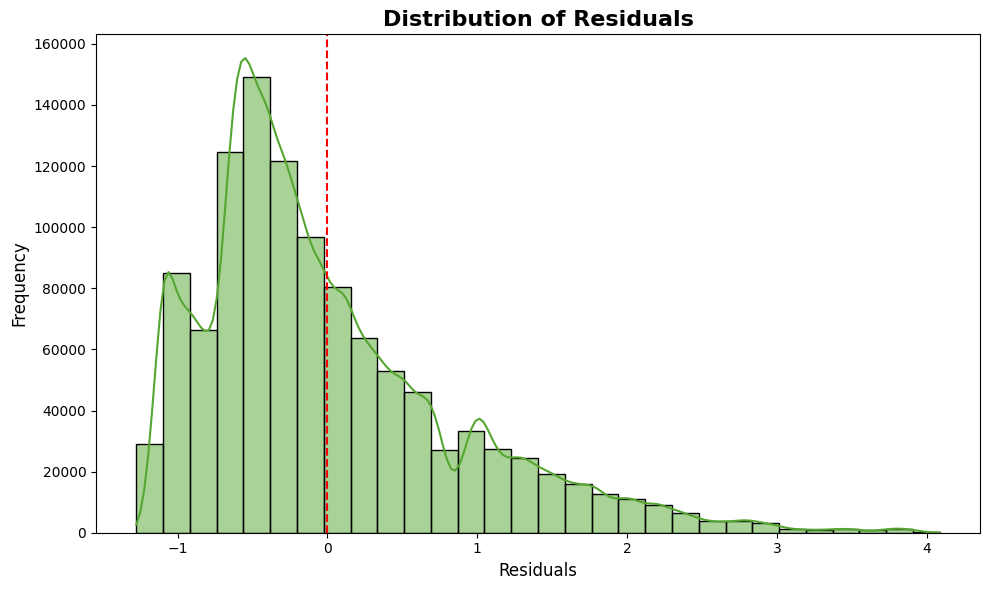

In [109]:
# 1. Performance Metrics
y_pred = final_model.predict(X)

# Calcul des métriques
rmsle = root_mean_squared_log_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

# Display performance metrics
print(f"\nPerformance Metrics:\n{'-'*30}")
print(f"RMSLE: {rmsle:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

# 2. Feature Importance
importances = final_model.feature_importance(importance_type='split')  # or 'gain'
features = preprocessor.get_feature_names_out()
sorted_indices = importances.argsort()[::-1]

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': [features[i] for i in sorted_indices],
    'Importance': importances[sorted_indices]
})

# Plot top 10 feature importances
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette="coolwarm")
plt.title("Top 10 Feature Importances", fontsize=16, fontweight='bold')
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

# 3. Residual Analysis
residuals = y - y_pred

# Residuals vs Predicted Values
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color="#007acc")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title("Residuals vs Predicted Values", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.tight_layout()
plt.show()

# Residual Distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color="#55a630")
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5)
plt.title("Distribution of Residuals", fontsize=16, fontweight='bold')
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

In [110]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(final_model, f)